In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mplcyberpunk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import mplcyberpunk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
datafile = '/content/drive/MyDrive/CodingDojo/Project1/ProjectDataSet_sales_predictions.csv'
df = pd.read_csv(datafile)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info() # to check data type and which columns has Nan values, here Item_Weight and Outlet_Size columns have Nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.duplicated().any() # to check for any duplicates

False

In [ ]:
#to locate Nan values in Item_Weight 
Nan_Values1 = pd.isnull(df['Item_Weight'])
Nan_Values1.value_counts() # to count Nan values in Item_Weight column

False    7060
True     1463
Name: Item_Weight, dtype: int64

In [ ]:
Nan_Values2 = pd.isnull(df['Outlet_Size']) #to total Nan values in Outlet_Size column 
Nan_Values2.value_counts()

False    6113
True     2410
Name: Outlet_Size, dtype: int64

# More than thousand values are missing in both the columns
# Since missing values are in very large number, filling missing values is better idea than dropping all of them 

In [ ]:
#filling Nan values in Numeric column which is Item_Weight for this Dataframe
# We will use interpolate method to fill missing values for Item_Weight column 
# note that this method only works for int or floats
New_df=df.interpolate(method ='linear', limit_direction ='forward')
New_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
New_df.isna().sum() # Outlet_Size column still has Nan values

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#filling Nan values in Outlet_Size 
final_df = New_df.fillna(method ='pad')
final_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
final_df.isna().sum() # No Nan values in new dataframe

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
final_df.duplicated().any() #to check there is no duplicate rows after filling values

False

In [ ]:
final_df['Item_Fat_Content'].value_counts() #to check string inconsistency in Object column

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#to make all string consistent in the column Item Fat content
final_df.loc[final_df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
final_df.loc[final_df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
final_df.loc[final_df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

In [ ]:
final_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Checked String consistency for some columns

In [ ]:
final_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
final_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
final_df['Outlet_Size'].value_counts()

Medium    3912
Small     3321
High      1290
Name: Outlet_Size, dtype: int64

In [ ]:
final_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
final_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

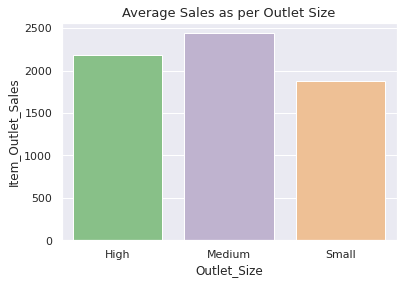

In [ ]:
#CALCULATING MEAN VALUE OF SALES AS OUTLET SIZE
Outlet_size_mean = final_df.groupby(['Outlet_Size'], 
                                    as_index= False
                                     )['Item_Outlet_Sales'].mean()

sns.set_theme(style='darkgrid', context='notebook');

sns.barplot(x=Outlet_size_mean['Outlet_Size'], 
            y=Outlet_size_mean['Item_Outlet_Sales'], 
            palette='Accent');

plt.title("Average Sales as per Outlet Size", 
              fontsize=13);
plt.savefig('salesproject1.png', dpi = 500)
#files.download("salesproject1.png")

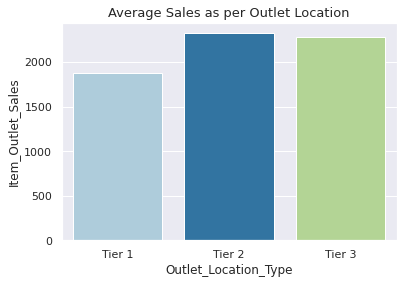

In [ ]:
#CALCULATING MEAN VALUE OF SALES AS OUTLET LOCATION
Outlet_location_mean = final_df.groupby(['Outlet_Location_Type'],
                                 as_index= False
                                 )['Item_Outlet_Sales'].mean()

sns.set_theme(style='darkgrid', context='notebook');

sns.barplot(x=Outlet_location_mean['Outlet_Location_Type'], 
            y=Outlet_location_mean['Item_Outlet_Sales'], 
            palette='Paired');

plt.title("Average Sales as per Outlet Location", 
              fontsize=13);

plt.savefig('salesproject2.png', dpi = 500)
#files.download("salesproject2.png")

### Outlet Size and Outlet Location Type columns have negligible impact on Total Average Sale

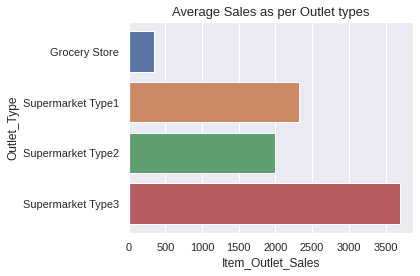

In [ ]:
#CALCULATING MEAN VALUE OF SALES AS OUTLET TYPE
Outlet_type_mean = final_df.groupby(['Outlet_Type'], 
                                    as_index= False
                                    )['Item_Outlet_Sales'].mean()

sns.barplot(x=Outlet_type_mean['Item_Outlet_Sales'], 
            y=Outlet_type_mean['Outlet_Type']);

plt.title("Average Sales as per Outlet types", fontsize=13);

plt.style.use("cyberpunk")
mplcyberpunk.add_glow_effects()
plt.tight_layout(h_pad=2)
plt.savefig('salesproject3.png', dpi = 500)
#files.download("salesproject3.png")

In [ ]:
supermarket_3 = final_df[final_df['Outlet_Type'] == 'Supermarket Type3']
supermarket_3['Outlet_Identifier'].value_counts()

OUT027    935
Name: Outlet_Identifier, dtype: int64

Super market type3 has only one outlet - OUT027 which generates the highest Average sale out of all outlet

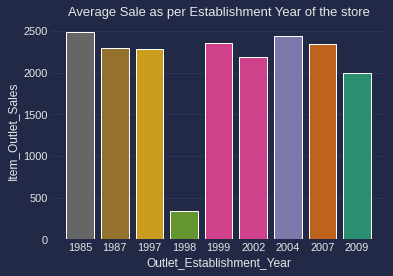

In [ ]:
#Average Sale as per Establishment Year of the store
Outlet_establishment_mean = final_df.groupby(['Outlet_Establishment_Year'],
                                              as_index= False
                                              )['Item_Outlet_Sales'].mean()

sns.barplot(x=Outlet_establishment_mean['Outlet_Establishment_Year'],
            y=Outlet_establishment_mean['Item_Outlet_Sales'],
            palette='Dark2_r');

plt.title("Average Sale as per Establishment Year of the store", 
              fontsize=13);

plt.style.use("cyberpunk")
mplcyberpunk.add_glow_effects()
plt.savefig('salesproject4.png', dpi = 500)
#files.download("salesproject4.png")

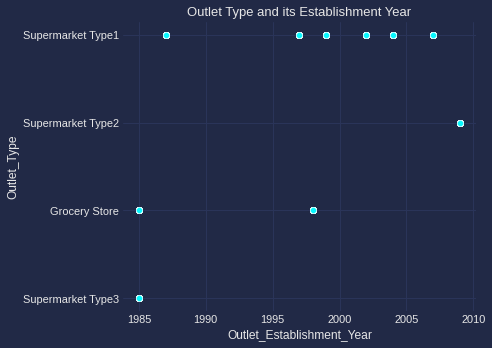

In [ ]:
x=final_df['Outlet_Type'].sort_values()
y=final_df['Outlet_Establishment_Year']
plt.figure(figsize=(7,5))

sns.scatterplot(x=y, y=x);

plt.title("Outlet Type and its Establishment Year", 
              fontsize=13);

plt.style.use("cyberpunk")
mplcyberpunk.add_glow_effects()
plt.tight_layout(h_pad=2)
plt.savefig('salesproject5.png', dpi = 300)
#files.download("salesproject5.png")

In 1998, only Grocery stores were established and notice, that year has the least Average Sale. what does this indicate is Sales value is not impacted by how old the partucular outlet is!

---



SO far Outlet related data have been observed

Data related to item 

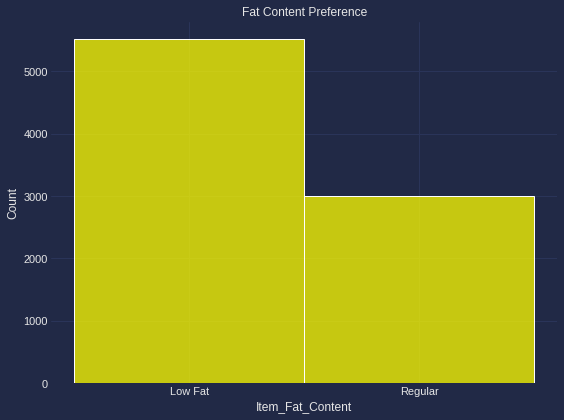

In [ ]:

plt.style.use('seaborn-bright')

plt.figure(figsize=(8,6))
sns.histplot(data= final_df, x='Item_Fat_Content',bins=100, 
             kde=False, color="yellow")
plt.title('Fat Content Preference', 
              fontsize=12);
#plt.xticks(rotation=90)
plt.tight_layout(h_pad=2)
plt.savefig('salesproject6.png', dpi = 300)
#files.download("salesproject6.png")

Low Fat content is high preference type


In [ ]:
ItemType_groupby = final_df.groupby(['Item_Type'], as_index=False
                                    )['Item_Outlet_Sales'].sum().sort_values(
                                        by='Item_Outlet_Sales', ascending = False)

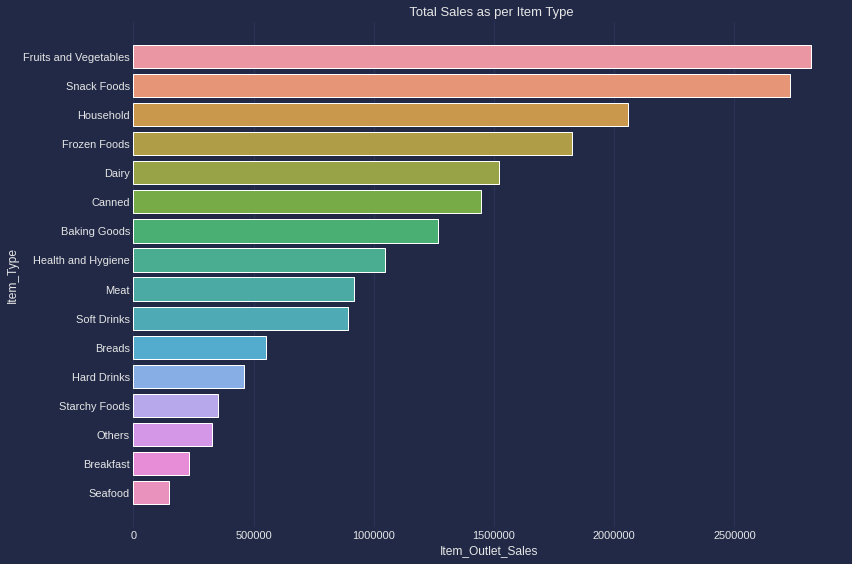

In [ ]:
#import mplcyberpunk
plt.figure(figsize=(12,8))
sns.barplot(x=ItemType_groupby['Item_Outlet_Sales'], 
            y=ItemType_groupby['Item_Type']);

plt.ticklabel_format(axis= 'x', style='plain')
plt.title(" Total Sales as per Item Type", 
              fontsize=13);

plt.style.use("cyberpunk")
mplcyberpunk.add_glow_effects();
plt.tight_layout(h_pad=2)
plt.savefig('salesproject7.png', dpi = 500)
#files.download("salesproject7.png")

Sales are more inclined towards Fruits and Vegetables, snack foods and less to seafood 

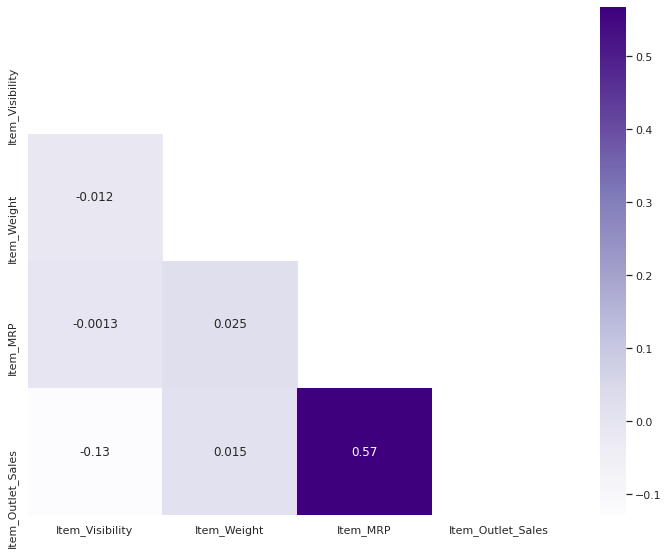

In [ ]:
Numeric_columns = final_df[['Item_Visibility', 'Item_Weight', 'Item_MRP', 
                    'Item_Outlet_Sales']]

sns.set(style="white", context='notebook')
plt.figure(figsize=(10,8))
corr_matrix=Numeric_columns.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, cmap='Purples', annot=True, mask=mask);

plt.tight_layout(h_pad=2)
plt.savefig('salesproject8.png', dpi = 300)
#files.download("salesproject8.png")

### Item Outlet sales have high positive CO relation with Item MRP where Negative Co relation with Item Visibility. Also very minimal co relation to Item Weight
###From all above analysis, its found that only few feature columns affect in Total Sales 

### Let's Encode Important Categorial features 

In [ ]:
OneHotEncoder = pd.get_dummies(final_df, columns = ['Item_Fat_Content', 
                                                    'Item_Type', 
                                                    'Outlet_Type', 
                                                    'Outlet_Establishment_Year', 
                                                    'Outlet_Size', 
                                                    'Outlet_Location_Type' ],
                                   drop_first = False)
OneHotEncoder.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
OneHotEncoder.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Item_Outlet_Sales', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establi

In [ ]:
X = OneHotEncoder[[
      'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_2009',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']]


In [ ]:
X

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0


In [ ]:
y = OneHotEncoder['Item_Outlet_Sales'].values

In [ ]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Prediction with Linear Regression

In [ ]:
#instantiate the model
Lregression = LinearRegression(fit_intercept= True)

In [ ]:
#fit the model
Lregression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predict y providing X
Lregression.predict(X_train[0:10])

array([2772.67248391, 2862.48498391, 1211.95373391,  951.70373391,
       2264.29748391, 1103.17248391, -696.45251609, 1810.23498391,
        747.96513581, 3305.46513581])

In [ ]:
Lregression.predict(X_test[0:10])

array([2857.73498391, 2021.23498391,  560.29748391, 2001.79748391,
        732.92248391,  871.29748391, 2003.23498391, 2527.92248391,
       1554.71513581, 1978.21513581])

In [ ]:
#Linear Regression Model Accuracy
scoreCheck1 = Lregression.score(X_train,y_train)
scoreCheck2 = Lregression.score(X_test,y_test)

In [ ]:
print('Linear Regression Model: \nScore with Train Data:', scoreCheck1, 
      '\nScore with Test Data:', scoreCheck2)

Linear Regression Model: 
Score with Train Data: 0.5550008439703961 
Score with Test Data: 0.5886439465674451


# Prediction with KNN


In [ ]:
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.preprocessing import StandardScaler

In [ ]:
#instantiate
Knn = KNeighborsRegressor(n_neighbors=6)
#fit 
Knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [ ]:
#predict y providing X
predict = Knn.predict(X_train)
predict

array([1712.54856667, 2646.2221    ,  447.63953333, ...,  418.1224    ,
       2453.473     ,  381.1705    ])

In [ ]:
Knn.predict(X_test)

array([2619.5901    , 2395.43743333, 1159.26876667, ..., 3676.76953333,
       1997.28903333, 1983.7511    ])

In [ ]:
print('KNN model: \nScore with train data:', Knn.score(X_train,y_train),
      '\nScore with test Data:', Knn.score(X_test,y_test))

KNN model: 
Score with train data: 0.6031768916686765 
Score with test Data: 0.45610930332602073


# Prediction with Random Forest

In [ ]:
#from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF = RandomForestRegressor(n_estimators = 150,
                           max_depth=6,
                           bootstrap = True,
                           random_state = 30)
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

In [ ]:
RF_Actual=RF.predict(X_train)

In [ ]:
RF_Predict=RF.predict(X_test)

In [ ]:
print('Random Forest Model: \nScore with Train data:', 
      RF.score(X_train, y_train), '\nScore with Test data:', 
      RF.score(X_test, y_test))

Random Forest Model: 
Score with Train data: 0.6177702641715458 
Score with Test data: 0.6204671735370194


In [ ]:
max_depth = list(range(1, 20))
score = []

for depth in max_depth:
    rf = RandomForestRegressor(n_estimators=150,
                               max_depth=depth,
                                 bootstrap=True)
    rf.fit(X_train, y_train)
    score.append(rf.score(X_test, y_test))

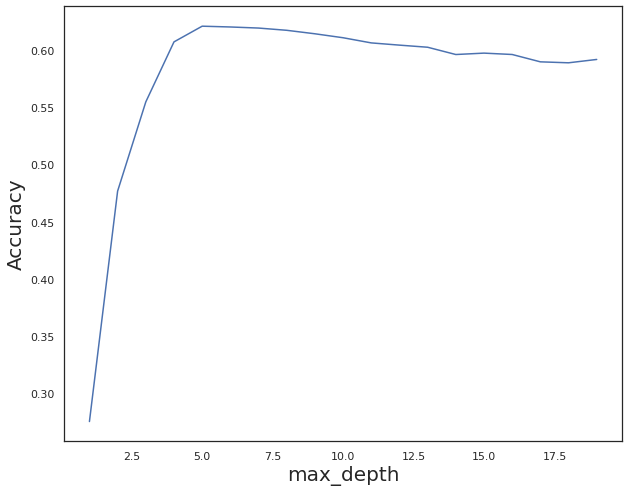

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8));
axes.plot(max_depth, score);
axes.set_xlabel('max_depth', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
plt.savefig('salesproject9.png', dpi = 500)
#files.download("salesproject9.png")

Score is not going beyond 62%

In [ ]:
print('Linear Regression Model: \nScore with Train Data:', scoreCheck1, 
      '\nScore with Test Data:', scoreCheck2)
print('\nKNN model: \nScore with train data:', Knn.score(X_train,y_train),
      '\nScore with test Data:', Knn.score(X_test,y_test))
print('\nRandom Forest Model: \nScore with Train data:', 
      RF.score(X_train, y_train), '\nScore with Test data:', 
      RF.score(X_test, y_test))

Linear Regression Model: 
Score with Train Data: 0.5550008439703961 
Score with Test Data: 0.5886439465674451

KNN model: 
Score with train data: 0.6031768916686765 
Score with test Data: 0.45610930332602073

Random Forest Model: 
Score with Train data: 0.6177702641715458 
Score with Test data: 0.6204671735370194


### Since Random forest model giving better score, its wise to choose Random forest model for future sales prediction

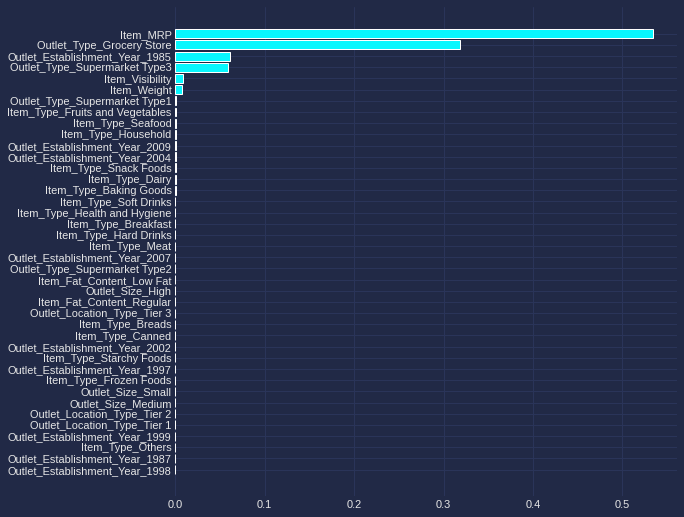

In [ ]:
#Feature Importance check
plt.figure(figsize = (9, 9))
plt.style.use("cyberpunk")

RF_features = pd.DataFrame({'feature': X.columns, 'feature_importance': RF.feature_importances_})
RF_features.sort_values(by = 'feature_importance', inplace = True)

plt.barh(RF_features['feature'], RF_features['feature_importance']);

mplcyberpunk.add_glow_effects();
plt.savefig('salesproject10.png', dpi = 300)
#files.download("salesproject10.png")

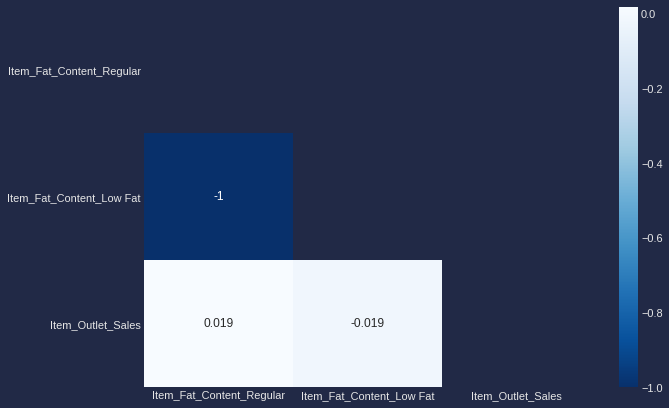

In [ ]:
Fat_Content = OneHotEncoder[['Item_Fat_Content_Regular','Item_Fat_Content_Low Fat','Item_Outlet_Sales']]

plt.figure(figsize=(10,7))
corr_matrix_1=Fat_Content.corr()

mask = np.zeros_like(corr_matrix_1)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix_1, cmap='Blues_r', annot=True, mask=mask);
plt.savefig('salesproject11.png', dpi = 300)
#files.download("salesproject11.png")

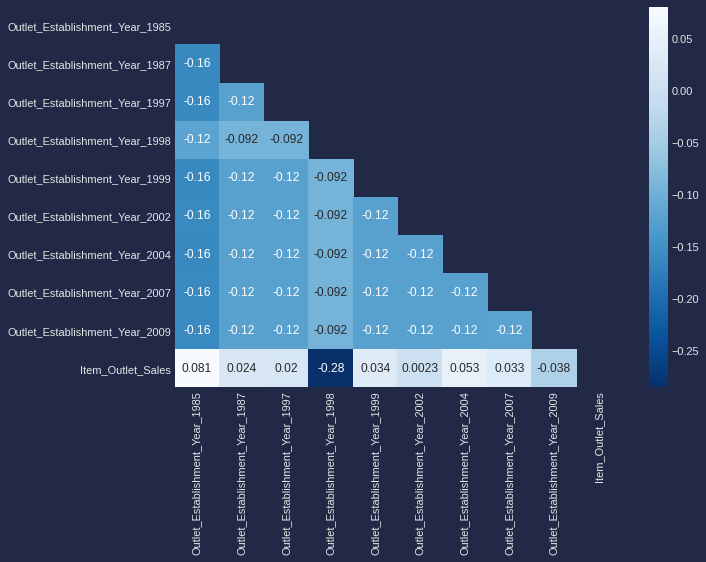

In [ ]:
Outlet_Year = OneHotEncoder[['Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_2009','Item_Outlet_Sales']]

plt.figure(figsize=(10,7))
corr_matrix_2=Outlet_Year.corr()

mask = np.zeros_like(corr_matrix_2)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix_2, cmap='Blues_r', annot=True, mask=mask);
plt.savefig('salesproject12.png', dpi = 500)
#files.download("salesproject12.png")

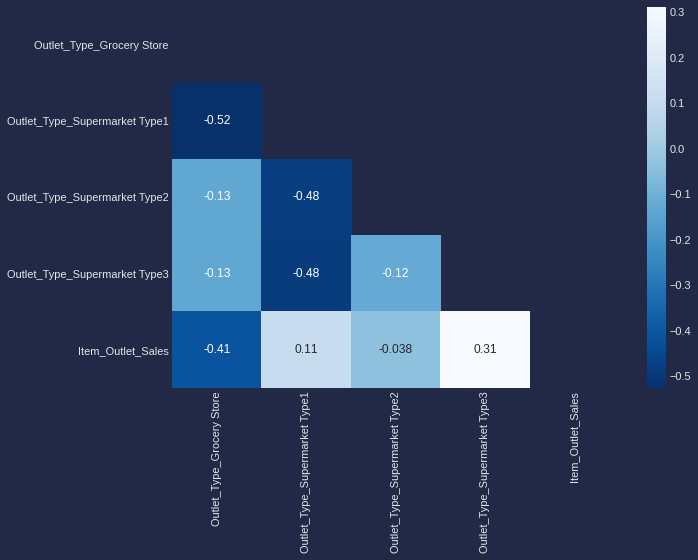

In [ ]:
Outlet_Type = OneHotEncoder[['Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3','Item_Outlet_Sales']]

plt.figure(figsize=(10,7))
corr_matrix_3=Outlet_Type.corr()

mask = np.zeros_like(corr_matrix_3)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix_3, cmap='Blues_r', annot=True, mask=mask);
plt.savefig('salesproject13.png', dpi = 500)
#files.download("salesproject13.png")

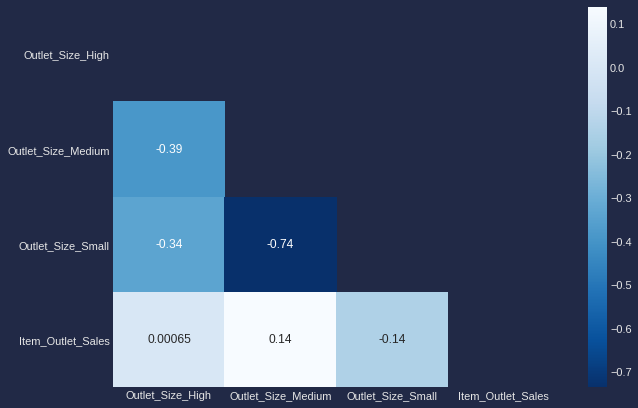

In [ ]:
Outlet_Size = OneHotEncoder[['Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small','Item_Outlet_Sales']]

plt.figure(figsize=(10,7))
corr_matrix_4=Outlet_Size.corr()

mask = np.zeros_like(corr_matrix_4)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix_4, cmap='Blues_r', annot=True, mask=mask);

plt.savefig('salesproject14.png', dpi = 500)
#files.download("salesproject14.png")

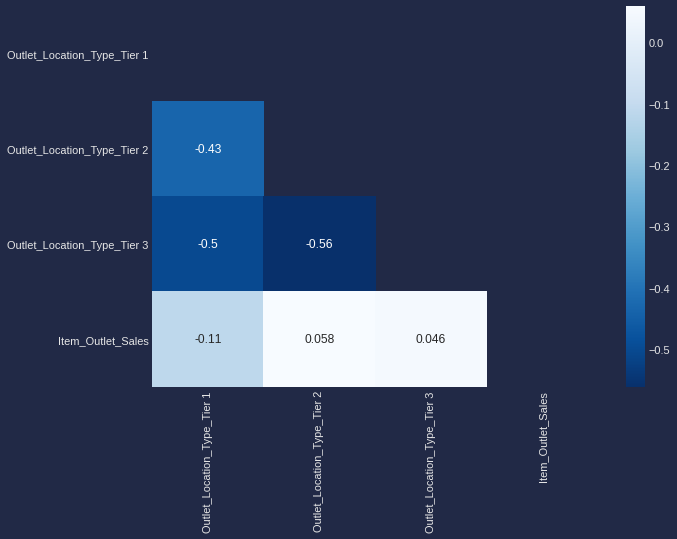

In [ ]:
Outlet_Tier = OneHotEncoder[['Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3','Item_Outlet_Sales']]

plt.figure(figsize=(10,7))
corr_matrix_5=Outlet_Tier.corr()

mask = np.zeros_like(corr_matrix_5)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix_5, cmap='Blues_r', annot=True, mask=mask);
plt.savefig('salesproject15.png', dpi = 500)
#files.download("salesproject15.png")

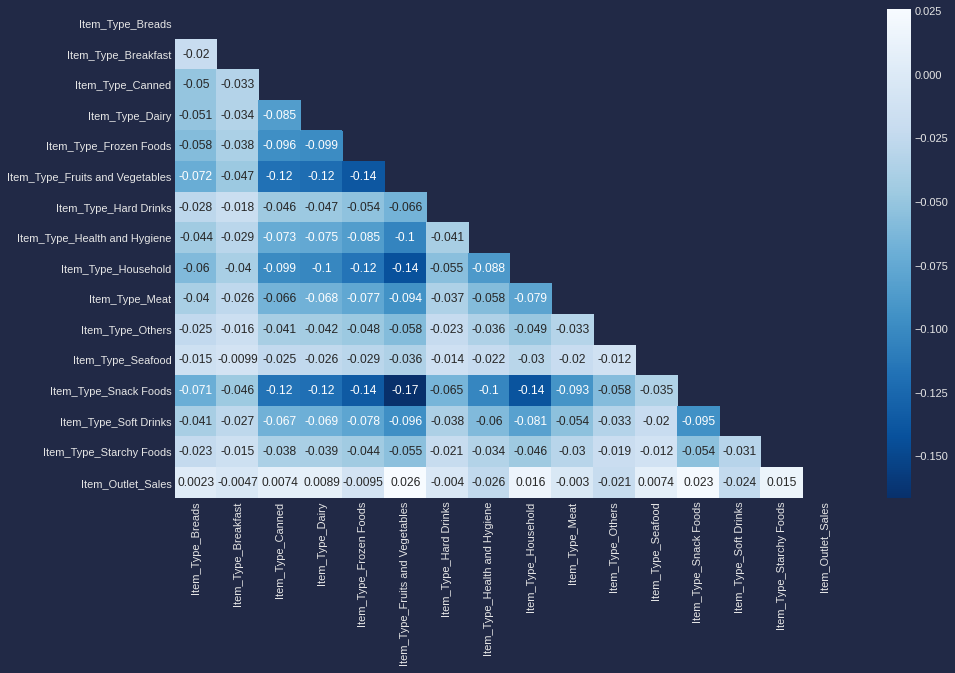

In [ ]:
Item_Type = OneHotEncoder[['Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods','Item_Outlet_Sales']]

plt.figure(figsize=(15,9))
corr_matrix_6=Item_Type.corr()

mask = np.zeros_like(corr_matrix_6)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix_6, cmap='Blues_r', annot=True, mask=mask);
plt.savefig('salesproject16.png', dpi = 500)
#files.download("salesproject16.png")

## Random forest model performs the best and should be first preference to predict sales.

## Important features that affect sales are Outlet type, and Item Type like Fruits and Vegetable and Sanck foods 